<a href="https://colab.research.google.com/github/ManishSuhas0026/Deep-Learning/blob/main/2348530_DL_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
import cv2
import matplotlib.pyplot as plt
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical

In [2]:
path='/content/drive/MyDrive/Animal/train'

In [3]:
directories = {
    '/content/drive/MyDrive/Animal/train/ELEPHANT' : 0,
    '/content/drive/MyDrive/Animal/train/HORSE': 1,
    '/content/drive/MyDrive/Animal/train/LION': 2,
    '/content/drive/MyDrive/Animal/train/cat': 3,
    '/content/drive/MyDrive/Animal/train/dog':4
}

In [5]:
def preprocess_images(directory, size=(100, 100)):
    images = []
    labels = []
    for subdir, label in directory.items():
        files = os.listdir(subdir)
        for file in files:
            img_path = os.path.join(subdir, file)
            try:
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, size)  # Resize to a uniform size
                    img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Warning: Unable to read image '{img_path}'. Skipping...")
            except Exception as e:
                print(f"Error processing image '{img_path}': {e}")
    return np.array(images), np.array(labels)

# Preprocess images and labels
images, labels = preprocess_images(directories)


In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

In [7]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training set shape: (3765, 100, 100, 3)
Validation set shape: (1129, 100, 100, 3)
Test set shape: (485, 100, 100, 3)
Training labels shape: (3765,)
Validation labels shape: (1129,)
Test labels shape: (485,)


In [13]:
model = Sequential()

# Convolutional layer 1 with Batch Normalization
model.add(Conv2D(32, (3, 3), input_shape=(100, 100, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2 with Batch Normalization
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3 with Batch Normalization
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 batch_normalization_5 (Bat  (None, 100, 100, 32)      128       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 50, 50, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 50, 50, 64)       

In [14]:
# Assuming you have four classes, you can specify the number of classes
num_classes = 5

# One-hot encode the labels for training set
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train_one_hot, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
95/95 [==============================] - 121s 1s/step - loss: 1.0995 - accuracy: 0.6165 - val_loss: 2.7859 - val_accuracy: 0.2284
Epoch 2/10
95/95 [==============================] - 115s 1s/step - loss: 0.6192 - accuracy: 0.7712 - val_loss: 4.0313 - val_accuracy: 0.2284
Epoch 3/10
95/95 [==============================] - 114s 1s/step - loss: 0.4224 - accuracy: 0.8486 - val_loss: 2.9885 - val_accuracy: 0.3174
Epoch 4/10
95/95 [==============================] - 116s 1s/step - loss: 0.3257 - accuracy: 0.8752 - val_loss: 3.0289 - val_accuracy: 0.3094
Epoch 5/10
95/95 [==============================] - 114s 1s/step - loss: 0.2258 - accuracy: 0.9250 - val_loss: 1.2407 - val_accuracy: 0.5857
Epoch 6/10
95/95 [==============================] - 112s 1s/step - loss: 0.1524 - accuracy: 0.9519 - val_loss: 1.0033 - val_accuracy: 0.6760
Epoch 7/10
95/95 [==============================] - 118s 1s/step - loss: 0.1324 - accuracy: 0.9572 - val_loss: 1.0974 - val_accuracy: 0.6228
Epoch 8/10
95

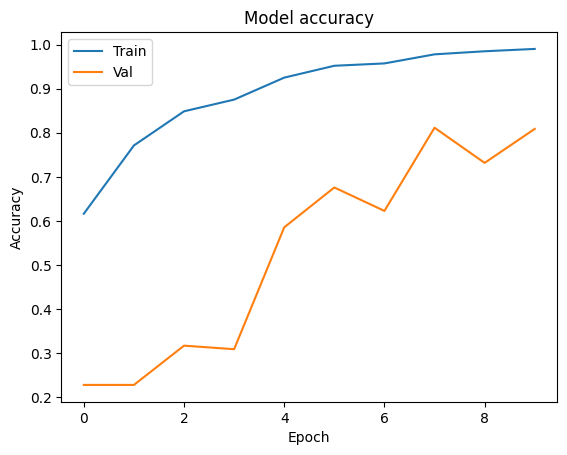

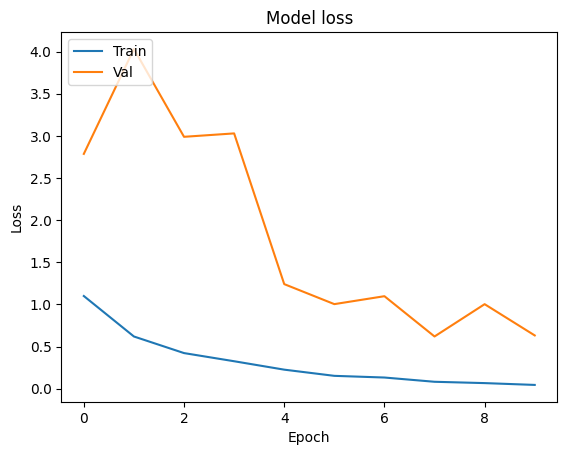

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 102ms/step


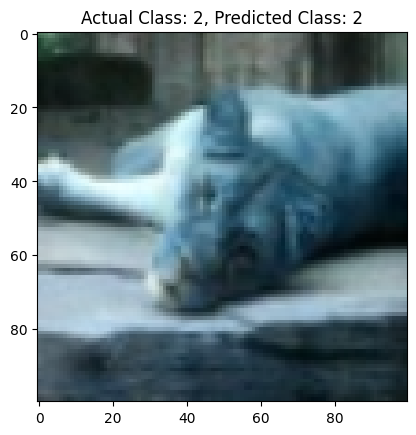

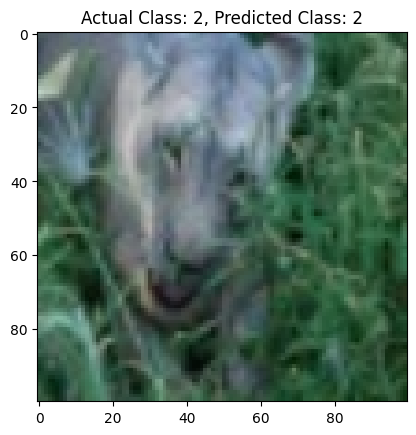

In [21]:
random_indices = np.random.choice(len(X_train), 5, replace=False)

# Selecting corresponding images and labels
random_images = X_train[random_indices]
random_labels = y_train[random_indices]

# Predicting classes
predictions = model.predict(random_images)

# Displaying images with predicted and actual labels
for i in range(2):
    plt.imshow(random_images[i])
    plt.title(f"Actual Class: {random_labels[i]}, Predicted Class: {np.argmax(predictions[i])}")
    plt.show()

36/36 [==============================] - 10s 278ms/step


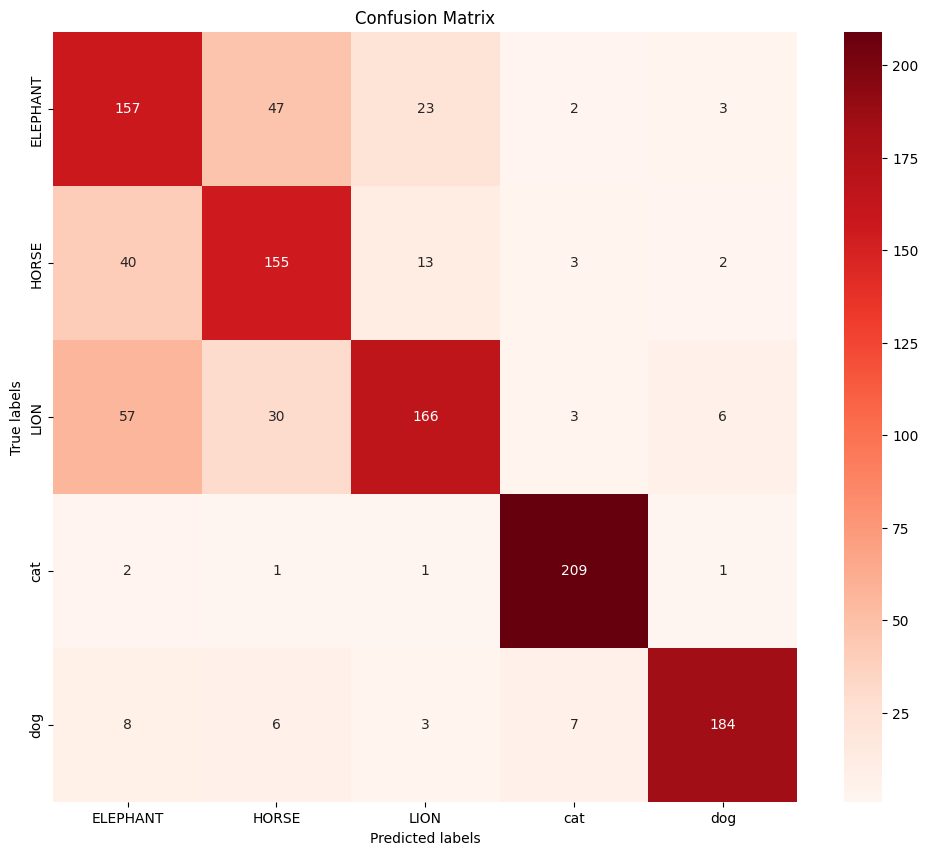

In [23]:
# Define class labels
class_labels = ['ELEPHANT', 'HORSE', 'LION', 'cat', 'dog']

# Assuming X_val is your validation dataset
# Assuming y_val is your validation labels (not one-hot encoded)

# Predicting classes for validation dataset
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert numerical indices to class labels
y_pred_labels = [class_labels[i] for i in y_pred_classes]
y_true_labels = [class_labels[i] for i in y_val]

# Creating confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Plotting confusion matrix
plt.figure(figsize=(12,10 ))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()